In [8]:
import tensorflow as tf
print(tf.__version__)
tf.compat.v1.disable_eager_execution()

2.3.0


In [9]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [10]:
train_data, test_data = imdb['train'], imdb['test']
tokenizer = info.features['text'].encoder
# Uncomment to see the subwords
#print(tokenizer.subwords)

In [11]:
sample_string = "TensorFlow, from basics to mastery"
tokenized_string = tokenizer.encode(sample_string)
print("Tokenized string is {}".format(tokenized_string))
original_string = tokenizer.decode(tokenized_string)
print("Original string is {}".format(original_string))

for ts in tokenized_string:
    print("{} -------> {}".format(ts,tokenizer.decode([ts])))

Tokenized string is [6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]
Original string is TensorFlow, from basics to mastery
6307 -------> Ten
2327 -------> sor
4043 -------> Fl
2120 -------> ow
2 -------> , 
48 -------> from 
4249 -------> basi
4429 -------> cs 
7 -------> to 
2652 -------> master
8050 -------> y


In [12]:
#BUFFER_SIZE = 10000
#BATCH_SIZE = 64
#train_dataset = train_data.shuffle(BUFFER_SIZE)
#train_dataset = train_dataset.padded_batch(BATCH_SIZE,tf.compat.v1.data.get_output_shapes(train_data))
#test_dataset = test_data.padded_batch(BATCH_SIZE,tf.compat.v1.data.get_output_shapes(test_data))

embedding_dim = 64
model = tf.keras.Sequential([
            tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
            tf.keras.layers.GlobalAveragePooling1D(),
            tf.keras.layers.Dense(6, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
])

model.summary()
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(train_data, epochs=10, validation_data=test_data, validation_steps=10)
#history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Train on None steps, validate on 10 steps
Epoch 1/10
  24995/Unknown - 209s 8ms/step - batch: 12497.0000 - size: 1.0000 - loss: 0.6841 - accuracy: 0.5398WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


25000/25000 [==============================] - 209s 8ms/step - batch: 12499.5000 - size: 1.0000 - loss: 0.6841 - accuracy: 0.5397 - val_loss: 0.6697 - val_accuracy: 0.5407
Epoch 2/10
25000/25000 [==============================] - 195s 8ms/step - batch: 12499.5000 - size: 1.0000 - loss: 0.6829 - accuracy: 0.5422 - val_loss: 0.6695 - val_accuracy: 0.5419
Epoch 3/10
25000/25000 [==============================] - 193s 8ms/step - batch: 12499.5000 - size: 1.0000 - loss: 0.6822 - accuracy: 0.5430 - val_loss: 0.6691 - val_accuracy: 0.5425
Epoch 4/10
25000/25000 [==============================] - 200s 8ms/step - batch: 12499.5000 - size: 1.0000 - loss: 0.6817 - accuracy: 0.5447 - val_loss: 0.6686 - val_accuracy: 0.5433
Epoch 5/10
25000/25000 [==============================] - 196s 8ms/step - batch: 12499.5000 - size: 1.0000 - loss: 0.6813 - accuracy: 0.5458 - val_loss: 0.6686 - val_accuracy: 0.5390
Epoch 6/10
25000/25000 [==============================] - 200s 8ms/step - batch: 12499.5000 - si

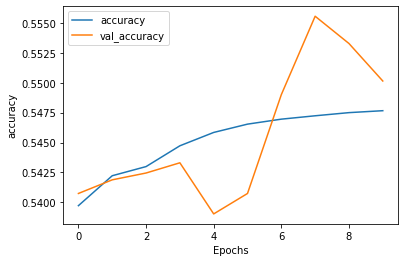

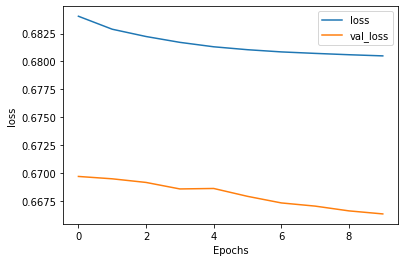

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()

plot_graphs(history,'accuracy')
plot_graphs(history,'loss')